In [1]:
import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
import statistics
from IPython.display import clear_output
import scipy
from scipy.stats import norm
from tqdm.notebook import tqdm_notebook

In [2]:
df = pd.read_csv("tarassov_important_interactions.csv") 
df

,Protein_A,Protein_B,Abd_A,Abd_B,Colony_Size
0,AAR2,LSM1,2.55,1066.00,23584
1,ABD1,TAF2,18.40,8.01,21605
2,ABD1,ECM4,18.40,21.90,21005
3,ABD1,RNR2,18.40,352.00,21044
4,ABF2,UBP6,640.00,126.00,21573
...,...,...,...,...,...
8554,ZIP2,DBP5,1.60,156.00,22056
8555,ZPR1,TAF2,119.00,8.01,22383
8556,ZPR1,ECM4,119.00,21.90,21555
8557,ZPR1,RNR2,119.00,352.00,38017


In [3]:
pro_A=df['Abd_A'].to_list()
pro_B=df['Abd_B'].to_list()
pro_A
A_mean,A_stdev=statistics.mean(pro_A),statistics.stdev(pro_A)
print(A_mean, A_stdev)
B_mean,B_stdev=statistics.mean(pro_B),statistics.stdev(pro_B)
# mu, std = norm.fit(pro_A)
# mu,std

135.45097090781633 278.43736789713654


In [4]:
Ai_max,Ai_min,Aj_max,Aj_min=df['Abd_A'].max(),df['Abd_A'].min(),df['Abd_B'].max(),df['Abd_B'].min()
print(Ai_max,Ai_min,Aj_max,Aj_min)
# print(math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min))
Ai_max,Ai_min,Aj_max,Aj_min=math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min)
Ai_max,Ai_min,Aj_max,Aj_min

9310.0 0.0 3420.0 0.13


(9310, 0, 3420, 0)

In [5]:
df.sort_values(by=['Colony_Size'], inplace=True, ascending=False)
df=df[1:11]

In [6]:
# df
df.reset_index(drop=True,inplace=True)

In [7]:
df

,Protein_A,Protein_B,Abd_A,Abd_B,Colony_Size
0,YNL190W,AGP1,835.0,10.6,214802
1,MET3,MET3,57.1,57.1,203046
2,SEC4,GDI1,234.0,172.0,194897
3,ERV29,AGP1,49.8,10.6,191611
4,YNL190W,GAP1,835.0,11.9,191457
5,VHS3,OST1,14.9,52.8,190626
6,VPH1,VMA13,149.0,207.0,182953
7,SRV2,SRV2,255.0,255.0,180483
8,YNL190W,OST1,835.0,52.8,179079
9,SHR3,GAP1,35.7,11.9,176711


In [8]:
Kd = []
for i in range(len(df)):
       Kd_rand = random.uniform(1, 10**4)
       Kd.append(Kd_rand)

Kd

[4451.910237611909,
 3145.420740766887,
 469.87145102161514,
 9872.22156998129,
 5485.742003952766,
 6232.20688586769,
 1184.924445120565,
 7474.411006253115,
 6143.22074919523,
 7966.697997547665]

In [9]:
mu_A, sigma_A = 3.7967176508404124, 1.5635593244880654 # mean and standard deviation
mu_B, sigma_B = 4.069167482029483, 1.5642948498523275 # mean and standard deviation

In [10]:
Ai = []
for i in range(len(df)):
       Ai_rand = random.uniform(Ai_min, Ai_max)
#        Ai_rand = np.random.lognormal(mu_A, sigma_A)
       Ai.append(Ai_rand)

print(Ai_min, Ai_max)
Ai

0 9310


[7724.097180280589,
 2923.334953440722,
 7120.710069085716,
 5055.680250230346,
 1833.2577736094108,
 5540.0088759116,
 9011.272861838865,
 4984.200663605246,
 3111.9959185655007,
 5483.00677241677]

In [11]:
Aj = []
for i in range(len(df)):
       Aj_rand = random.uniform(Aj_min, Aj_max)
#        Aj_rand = np.random.lognormal(mu_B, sigma_B)
       Aj.append(Aj_rand)
    
print(Aj_min, Aj_max)
Aj

0 3420


[687.1847773701239,
 879.4927352166856,
 1124.2264765072239,
 2151.6098760516725,
 3103.3643359090083,
 2542.839847865387,
 3317.8378292435973,
 1615.1036862602703,
 2274.762409923623,
 606.49987683799]

In [12]:
abd = pd.read_csv("tarassov_protein_abundances.csv") 
abd

,Systematic Name,Standard Name,Qualifier a,Mean molecules per cell,Median molecules per cell,Coefficient of Variation,LU,PENG,KUL,LAW,...,TKA,BRE,DEN,MAZ,CHO,YOF,NEW,LEE,DAV,GHA
0,YMR191W,SPG5,Verified,3.359783e+00,3.359783,NaN,NaN,NaN,3.359783e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YJL093C,TOK1,Verified,3.804228e+00,3.804228,NaN,NaN,NaN,3.804228e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YER184C,TOG1,Verified,4.725730e+00,4.725730,NaN,NaN,NaN,4.725730e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YGL063W,PUS2,Verified,5.497247e+00,5.497247,NaN,NaN,NaN,5.497247e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YPL159C,PET20,Verified,6.922929e+00,6.922929,NaN,NaN,NaN,6.922929e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,YCR012W,PGK1,Verified,1.048126e+06,535389.467835,118.212499,1898620.0,370624.0,5.612653e+05,3.696853e+06,...,632360.321606,762925.325484,3.869733e+06,NaN,535389.467835,NaN,467325.245209,1.013168e+06,2.518955e+06,314000.0
5387,YLR044C,PDC1,Verified,1.334957e+06,581219.289895,167.610282,1335789.0,284185.0,7.056524e+05,4.366751e+06,...,749870.982279,458461.578265,8.719740e+06,NaN,802711.880877,NaN,581219.289895,1.152585e+06,4.778059e+06,8970.0
5388,YHR174W,ENO2,Verified,1.392599e+06,736616.685356,169.701905,3055113.0,96517.0,9.298181e+05,9.756854e+05,...,698792.974393,786698.099060,9.928852e+06,NaN,711030.657259,762202.713453,867615.284478,1.926174e+06,3.651029e+06,2610.0
5389,YKL060C,FBA1,Verified,1.160837e+06,737008.613917,151.923907,2044661.0,276079.0,8.476516e+05,NaN,...,811477.040646,932942.583979,7.403471e+06,NaN,662540.187189,NaN,541286.587601,1.107529e+06,3.317388e+06,1020000.0


In [13]:
def fitness(Kda, Ai, Aj):
    Ki=0.00054
    a=0.1
    B=1.3
    MTX=440
    Kapp=1

    A=[]
    f_c=[]

    for i in range(len(df)):

        f_cur=(a*Kapp*Ki*Ai[i]*Aj[i])/((B*Ki*Kda[i])+(B*Kda[i]*MTX)+(Kapp*Ki*Ai[i]*Aj[i]))
        f_c.append(f_cur)
#         print(f_c)


        A.append(min(Ai[i],Aj[i])+Ai[i])
#         print(A,'\n')
    
    return A,f_c
#     print(A_total,'\n')
#     print(f_exp,'\n')
#     print(f_curr,'\n')

In [14]:
def fitness_exp(df):
    f_exp=[]
    for i in range(len(df)):
        f_exp_c=(1/345600)*math.log(df['Colony_Size'][i]/20)
        f_exp.append(f_exp_c)

    return f_exp

In [15]:
def Kd_n(Kd):
    
    ddg=random.gauss(mu, sigma)
    Kd_new=[element * math.exp(B*ddg) for element in Kd]
    return Kd_new

In [16]:
def cost(A_total, f_exp, f_curr):
    f_sub=0
    A_sub=0
    for i in range(len(df)):
        f_sub+=(f_curr[i]-f_exp[i])**2
        if(len(abd.loc[abd['Standard Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1])>0):      
            A_sub+=(A_total[i]-abd.loc[abd['Standard Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1].values[0])
        elif(len(abd.loc[abd['Systematic Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1])>0):      
            A_sub+=(A_total[i]-abd.loc[abd['Systematic Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1].values[0])
        else:
            print(df['Protein_A'][i])
    
#     print(f_sub,A_sub)
    cost=f_sub+(A_sub**2)
    return cost
#     print('Cost: ',cost)
#     print(f_sub)
#     print(A_sub**2)

In [17]:
# mu = 1
# sigma = 1.7
# B=-0.01

# f_exp=fitness_exp(df)
# Kd_new=Kd_n(Kd)
# A_total, f_curr=fitness(Kd, Ai, Aj)
# A_total_new, f_curr_new=fitness(Kd_new, Ai, Aj)
# C_old=cost(A_total, f_exp, f_curr)
# print('\n\n')
# C_new=cost(A_total_new, f_exp, f_curr_new)
# print(Kd,'\n\n',Kd_new,'\n\n',f_curr,'\n\n',f_curr_new,'\n\n',C_old,'\n\n',C_new)

In [18]:
A_total, f_curr=fitness(Kd, Ai, Aj)
A_total, f_curr

([8411.281957650714,
  3802.8276886574076,
  8244.93654559294,
  7207.290126282019,
  3666.5155472188217,
  8082.848723776987,
  12329.110691082462,
  6599.304349865516,
  5386.758328489124,
  6089.50664925476],
 [0.00011243033506296004,
  7.710708527114216e-05,
  0.0015829442524222842,
  0.0001039139622295047,
  9.78122205439696e-05,
  0.00021294087225363442,
  0.0023266126408645242,
  0.00010157218689900277,
  0.00010866856700142061,
  3.939102088429554e-05])

In [19]:
f_exp=fitness_exp(df)
f_exp

[2.685688564527336e-05,
 2.6694026504007606e-05,
 2.6575504106811967e-05,
 2.6526302895226932e-05,
 2.652397640553916e-05,
 2.6511390042470202e-05,
 2.6392512426741455e-05,
 2.6353181701215614e-05,
 2.633058464898387e-05,
 2.6292067810247114e-05]

In [20]:
Kd

[4451.910237611909,
 3145.420740766887,
 469.87145102161514,
 9872.22156998129,
 5485.742003952766,
 6232.20688586769,
 1184.924445120565,
 7474.411006253115,
 6143.22074919523,
 7966.697997547665]

Progress:   0%|          | 0/7000 [00:00<?, ?it/s]

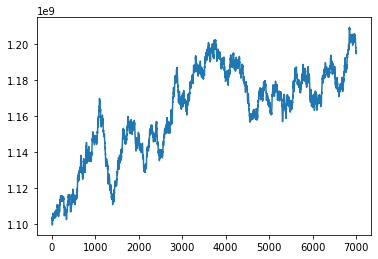

In [21]:
t=0

mu = 1
sigma = 1.7
B=0.001
Ai_max,Ai_min=max(Ai),min(Ai)
Aj_max,Aj_min=max(Aj),min(Aj)

dC_array=[]
dC_sq_array=[]
C_new_array=[]
C_old_array=[]
Ai_track=[]
Aj_track=[]
Kd_track=[]
test=[]
C_new=0



# while(t<7000):
for t in tqdm_notebook(range(7000),desc='Progress'):
    
    f_exp=fitness_exp(df)
    Kd_new=Kd_n(Kd)
    
    Ai_len=len(Ai)
    Ai_pos=random.randint(0,Ai_len-1)
    E_a=random.gauss(0, 0.001)
    temp_Ai=Ai[Ai_pos]*(10**E_a)
    Ai_tmp=Ai
    if(temp_Ai<Ai_max and temp_Ai>Ai_min):
        Ai_tmp[Ai_pos]=temp_Ai

    Aj_len=len(Aj)
    Aj_pos=random.randint(0,Aj_len-1)
    E_b=random.gauss(0, 0.001)
    temp_Aj=Aj[Aj_pos]*(10**E_b)
    Aj_tmp=Aj
    if(temp_Aj<Aj_max and temp_Aj>Aj_min):
        Aj_tmp[Aj_pos]=temp_Aj
        
        
    A_total, f_curr=fitness(Kd, Ai, Aj)#comment this
    A_total_new, f_curr_new=fitness(Kd_new, Ai_tmp, Aj_tmp)
    C_old=cost(A_total, f_exp, f_curr)
    C_new=cost(A_total_new, f_exp, f_curr_new)
    dC=C_new-C_old
    
    C_old_array.append(C_old)
    C_new_array.append(C_new)
    dC_array.append(dC)
    dC_sq_array.append(dC**2)
    Ai_track.append(Ai.copy())
    Aj_track.append(Aj.copy())
    Kd_track.append(Kd)

#     print('**',Ai_track,'\n\n')
#     print(t,dC)
    
#     print(Kd,'\n\n',Kd_new,'\n\n',A_total,'\n\n',A_total_new,'\n\n',C_new,C_old,dC)
#     test.append(np.exp(B*dC))
    if((random.random()<=np.exp(-B*dC))): ##np. or math.
#         print('1')
#         C_new=cost(A_total_new, f_exp, f_curr_new)
        Kd_new_temp=Kd_new
        Ai=Ai_tmp
        Aj=Aj_tmp

#         print(t,Ai,'\n',Aj,'\n\n')

#         Ai_len=len(Ai)
#         Ai_pos=random.randint(0,Ai_len-1)
#         E_a=random.gauss(0, 0.0001)
#         temp_Ai=Ai[Ai_pos]*(10**E_a)
#         if(temp_Ai<Ai_max and temp_Ai>Ai_min):
#             Ai[Ai_pos]=temp_Ai
                
#         Aj_len=len(Aj)
#         Aj_pos=random.randint(0,Aj_len-1)
#         E_b=random.gauss(0, 0.0001)
#         temp_Aj=Aj[Aj_pos]*(10**E_b)
#         if(temp_Aj<Aj_max and temp_Aj>Aj_min):
#             Aj[Aj_pos]=temp_Aj

#         print(Ai_pos,Aj_pos)
#         print(Ai,'\n',temp_Ai,'\n',Aj,'\n',temp_Aj,'\n\n')

    else:
#         print('2')
        Kd_new_temp=Kd
        Ai_tmp=Ai
        Aj_tmp=Aj
#         Ai=Ai_tmp
#         Aj=Aj_tmp
    
#         Ai_max,Ai_min=max(Ai),min(Ai)
#         E_a=random.gauss(0, 0.0001)
#         Ai=[(element*(10**E_a) if (element*(10**E_a)>Ai_min and element*(10**E_a)<Ai_max) else element) for element in Ai]
        
#         Aj_max,Aj_min=max(Aj),min(Aj)
#         E_b=random.gauss(0, 0.0001)
#         Aj=[(element*(10**E_b) if (element*(10**E_b)>Aj_min and element*(10**E_b)<Aj_max) else element) for element in Aj]

    Kd=Kd_new_temp
    t=t+1
#     print(t,'out',Ai,'\n',Aj,'\n\n\n')

    
#     count=0
#     x=[]
#     y=C_new_array

#     for a in range(len(y)):
#         x.append(a)

#     plt.plot(x,y)
#     plt.show()
#     clear_output(wait=False)

#     print(t,B,dC)
#     if dC<=math.exp(-3):
#         break
    
# print(Kd,'\n\n', Kd_new,'\n\n', Kd_new_temp,'\n\n',dC,'\n TIME:',t)

count=0
x=[]
y=C_new_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

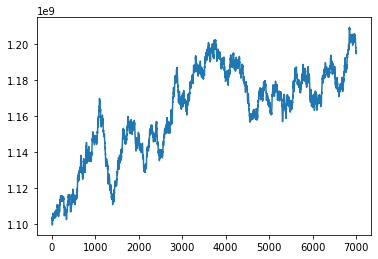

In [22]:
count=0
x=[]
y=C_old_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

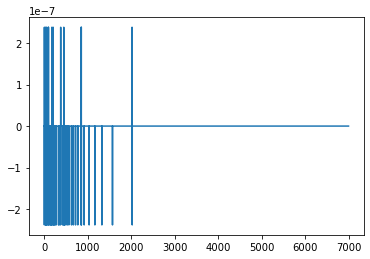

In [23]:
count=0
x=[]
y=dC_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

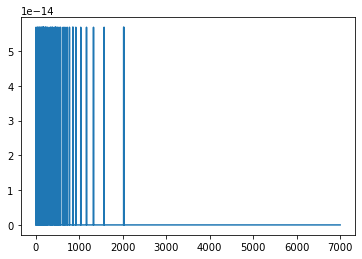

In [24]:
count=0
x=[]
y=dC_sq_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

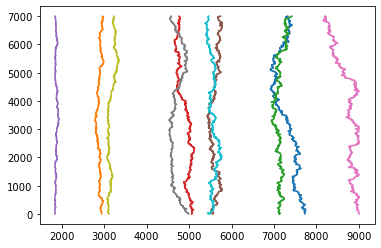

In [25]:
rng=np.arange(0,len(Ai_track))
plt.plot(Ai_track,rng)

In [26]:
# t,Ai_track

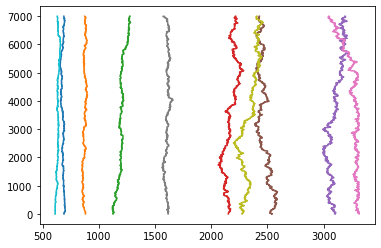

In [27]:
rng=np.arange(0,len(Aj_track))
plt.plot(Aj_track,rng)

In [28]:
# Aj_track

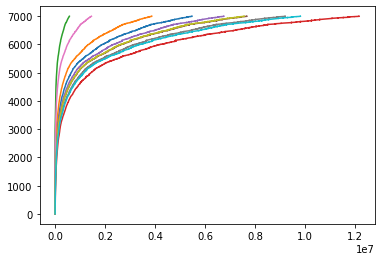

In [29]:
rng=np.arange(0,len(Kd_track))
plt.plot(Kd_track,rng)

In [30]:
Kd

[5486658.778324701,
 3876504.5559657775,
 579082.7271519329,
 12166802.169749087,
 6760781.982378297,
 7680746.195148729,
 1460334.05021205,
 9211673.320319183,
 7571077.189741152,
 9818381.58667679]